### Loss function an percepton training

In [1]:
def sigmoide(u):
    g = np.exp(u)/(1 + np.exp(u))
    return g
#Aprendizaje
def Gradiente(MaxIter = 100000, eta = 0.001):
    w = np.array([30,-40,-120])#np.ones(3).reshape(3, 1)
    N = len(y2)
    Error =np.zeros(MaxIter)
    Xent = np.concatenate((X2,np.ones((100,1))),axis=1)

    for i in range(MaxIter):
        tem = np.dot(Xent,w)
        tem2 = sigmoide(tem.T)-np.array(y2)
        Error[i] = np.sum(abs(tem2))/N
        tem = np.dot(Xent.T,tem2.T)
        wsig = w - eta*tem/N
        w = wsig
    return w, Error

In [10]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X, y = iris.data, iris.target
X2 = X[:100][:,:2]
y2 = y[:100]
fig, ax = plt.subplots(1,1)
ax.scatter(X2[:,0], X2[:,1], c=y2, cmap="Accent");

ImportError: Matplotlib requires numpy>=1.23; you have 1.22.4

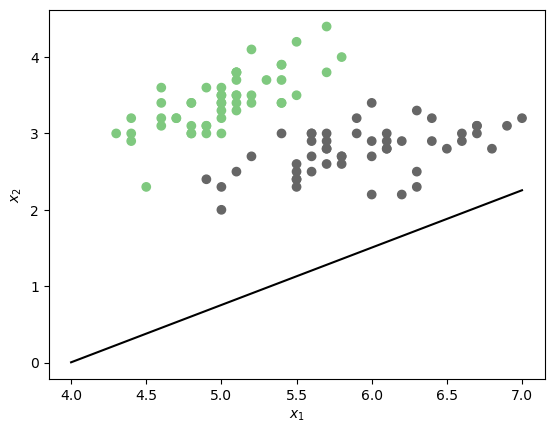

In [11]:

import time
fig, ax = plt.subplots(1,1)
iris = datasets.load_iris()
X, y = iris.data, iris.target
X2 = X[:100][:,:2]
y2 = y[:100]
ax.scatter(X2[:,0], X2[:,1], c=y2,cmap="Accent");
w,_ = Gradiente(MaxIter = 1)
x1 = np.linspace(4,7,20)
x2 = -(w[0]/w[1])*x1 - (w[2]/w[1])
line1, = ax.plot(x1,x2,'k')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

for i in range(1,10000,100):
    w,_ = Gradiente(MaxIter = i,eta = 0.01)
    x2 = -(w[0]/w[1])*x1 - (w[2]/w[1])
    line1.set_ydata(x2)
    if i > 1000:
        ax.set_ylim([1.8,4.8])
    plt.show()
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(.300)

line1, = ax.plot(x1,x2,'k')



In [22]:
import os
import gzip
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=16384)])
  except RuntimeError as e:
    print(e)

2024-08-11 03:00:09.131818: I external/local_xla/xla/stream_executor/rocm/rocm_gpu_executor.cc:787] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-08-11 03:00:09.156157: I external/local_xla/xla/stream_executor/rocm/rocm_gpu_executor.cc:787] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-08-11 03:00:09.156217: I external/local_xla/xla/stream_executor/rocm/rocm_gpu_executor.cc:787] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [23]:
from tensorflow.keras import datasets

Reshape to get a lineal vector of the clothes

In [6]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


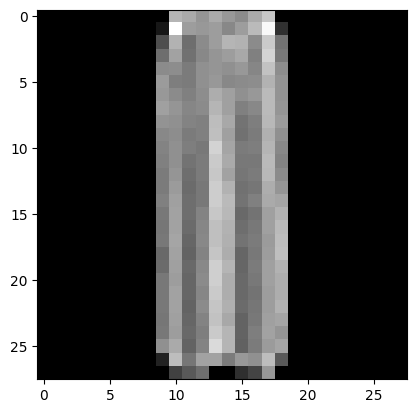

In [24]:
ind = np.random.permutation(X_train.shape[0])
plt.imshow(x_train[ind[0],:,:], cmap='gray');

In [8]:
from tensorflow.keras import utils 
from sklearn.preprocessing import StandardScaler

input_dim = X_train.shape[1]

scaler = StandardScaler()
X_trainN = scaler.fit_transform(X_train)
X_testN = scaler.transform(X_test)

# convert list of labels to binary class matrix
y_trainOHE = utils.to_categorical(y_train)
nb_classes = y_trainOHE.shape[1]

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [54]:
model = Sequential([
    Dense(32, input_shape = (input_dim, )),
    Activation("tanh"),
    Dense(nb_classes),
    Activation("softmax")

])

2024-08-11 03:30:25.310746: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:30:25.311987: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:30:25.319633: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:30:25.320909: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


In [55]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 32)                25120     
                                                                 
 activation_2 (Activation)   (None, 32)                0         
                                                                 
 dense_12 (Dense)            (None, 10)                330       
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
from tensorflow import optimizers
sgd = optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", optimizer=sgd)

In [17]:
model.train_on_batch(X_trainN, y_trainOHE) #Train with the transform data

2024-08-11 03:05:15.371108: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:05:15.406421: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:05:15.407196: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:05:15.475075: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:05:15.475723: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:05:15.531567: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:05:15.532406: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:05:15.533168: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:05:15.533889: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:05:15

2.5312459468841553

In [56]:
preds = model.predict(x_test[0,:].reshape(1, input_dim),verbose=0)

2024-08-11 03:30:40.570566: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:30:40.571540: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:30:40.573339: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:30:40.574566: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:30:40.582000: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:30:40.583443: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:30:40.595796: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:30:40.597318: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:30:40.598617: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:30:40

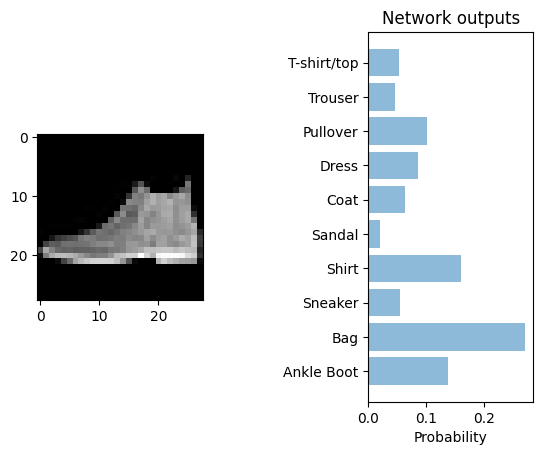

In [25]:
objects = ('Ankle Boot', 'Bag', 'Sneaker', 'Shirt', 'Sandal', 'Coat', 'Dress', 'Pullover', 'Trouser', 'T-shirt/top')
y_pos = np.arange(nb_classes)
performance = preds.flatten()
plt.subplot(121)
plt.imshow(X_test[0,:].reshape(28,28), cmap='gray');
plt.subplot(122) 
plt.barh(y_pos[::-1], performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Probability')
plt.title('Network outputs')
plt.subplots_adjust(wspace = 1)
plt.show()

whit more epochs and a larger batch size

In [81]:
model.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

Epoch 1/10


2024-08-11 03:35:48.601044: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:35:48.601707: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:35:48.605736: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:35:48.606415: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:35:48.610539: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:35:48.611300: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:35:48.635699: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:35:48.636359: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:35:48.641254: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:35:48

ValueError: Unexpected result of `train_function` (Empty logs). This could be due to issues in input pipeline that resulted in an empty dataset. Otherwise, please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [35]:
preds = model.predict(x_test[0,:].reshape(1, input_dim),verbose=0)

2024-08-11 03:19:12.622017: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:19:12.622687: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:19:12.626414: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:19:12.627053: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:19:12.632853: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:19:12.633558: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:19:12.634296: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:19:12.634869: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:19:12.638013: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:19:12

In [36]:
preds.flatten()

array([5.0931028e-09, 4.1545434e-07, 2.5244819e-06, 1.3558255e-07,
       8.7068347e-06, 1.5021920e-03, 1.7196035e-07, 4.4037707e-02,
       1.9093110e-05, 9.5442897e-01], dtype=float32)

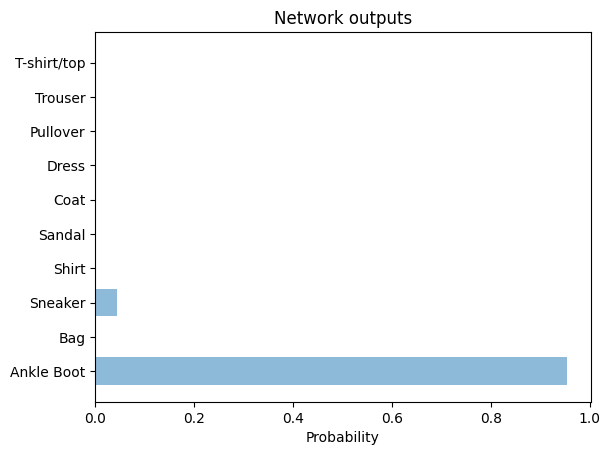

In [37]:
performance = preds.flatten()
plt.barh(y_pos[::-1], performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Probability')
plt.title('Network outputs')
plt.subplots_adjust(wspace = 1)
plt.show()

To get the item we need the max posibility so

In [38]:
preds = np.argmax(model.predict(X_testN), axis=1)
acurr = np.mean(preds == y_test)
print("Acurracy =", acurr * 100, "%")

233/313 [=====================>........] - ETA: 0s

2024-08-11 03:19:19.678107: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:19:19.679061: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:19:19.683308: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:19:19.684009: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:19:19.690185: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:19:19.690926: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:19:19.692739: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:19:19.693334: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:19:19.696654: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:19:19

313/313 [==============================] - 0s 651us/step
Acurracy = 85.48 %


In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 32)                25120     
                                                                 
 activation_2 (Activation)   (None, 32)                0         
                                                                 
 dense_12 (Dense)            (None, 10)                330       
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


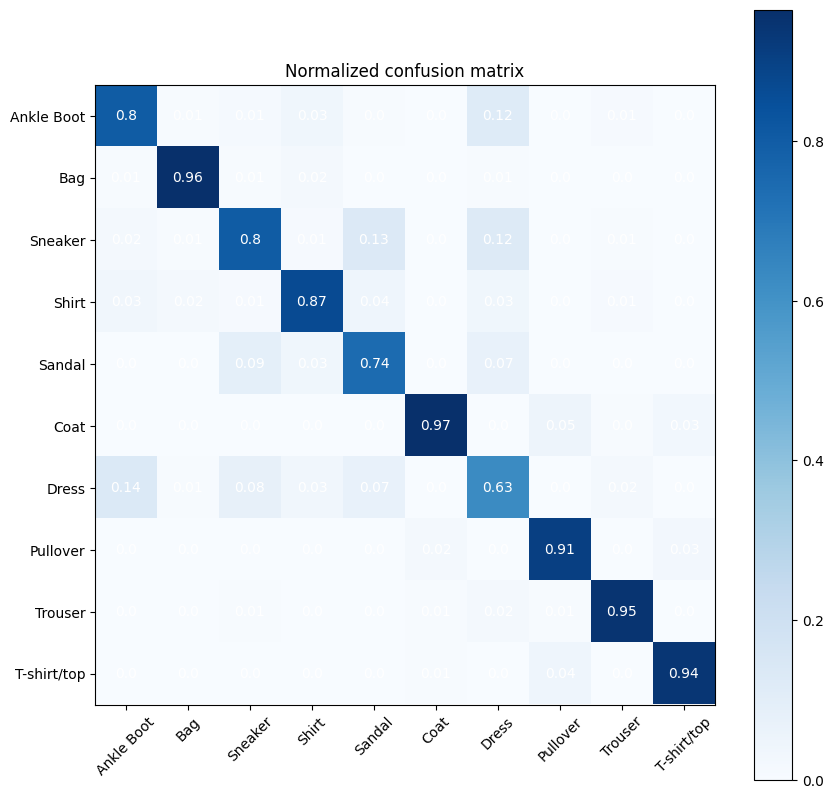

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
cm = cm / np.sum(cm,axis=0) # to normalize
cmap = plt.cm.Blues
tick_marks = np.arange(nb_classes)
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, np.around(cm[i, j],decimals=2),
                       ha="center", va="center", color="w")
plt.title('Normalized confusion matrix')
fig.colorbar(im)
plt.xticks(tick_marks, objects, rotation=45)
plt.yticks(tick_marks, objects)

## Make it functional

In [68]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


inputs = Input(shape=(784,)) # a tensor
type(inputs)

keras.src.engine.keras_tensor.KerasTensor

This way is like conecting the layers line by line then compiling the model

In [83]:
x = Dense(64, activation="tanh")(inputs)
x = Dense(32, activation="tanh")(x)
predictions = Dense(nb_classes, activation="softmax")(x)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer="sgd", loss="categorical_crossentropy")


2024-08-11 03:36:57.825318: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:36:57.826327: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:36:57.831120: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:36:57.831932: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:36:57.836416: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:36:57.837220: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


In [84]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_25 (Dense)            (None, 64)                50240     
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [85]:
model.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

Epoch 1/10


2024-08-11 03:37:01.607246: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:37:01.607928: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:37:01.612287: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:37:01.612954: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:37:01.617069: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:37:01.617842: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:37:01.643320: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:37:01.643984: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:37:01.649855: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:37:01

3375/3375 - 7s - loss: 0.5476 - val_loss: 0.4139 - 7s/epoch - 2ms/step
Epoch 2/10


2024-08-11 03:37:13.938921: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:37:13.942216: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:37:13.944906: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


3375/3375 - 6s - loss: 0.3882 - val_loss: 0.3751 - 6s/epoch - 2ms/step
Epoch 3/10


2024-08-11 03:37:18.737683: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:37:18.740416: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:37:18.742917: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


3375/3375 - 5s - loss: 0.3485 - val_loss: 0.3542 - 5s/epoch - 1ms/step
Epoch 4/10


2024-08-11 03:37:23.981944: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:37:23.985130: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:37:23.987977: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


3375/3375 - 5s - loss: 0.3234 - val_loss: 0.3523 - 5s/epoch - 2ms/step
Epoch 5/10


2024-08-11 03:37:29.619092: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:37:29.621793: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:37:29.624362: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


3375/3375 - 6s - loss: 0.3033 - val_loss: 0.3411 - 6s/epoch - 2ms/step
Epoch 6/10


2024-08-11 03:37:35.091000: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:37:35.093704: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:37:35.096195: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


3375/3375 - 5s - loss: 0.2868 - val_loss: 0.3404 - 5s/epoch - 2ms/step
Epoch 7/10


2024-08-11 03:37:40.403614: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:37:40.406274: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:37:40.408750: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


3375/3375 - 5s - loss: 0.2723 - val_loss: 0.3375 - 5s/epoch - 2ms/step
Epoch 8/10


2024-08-11 03:37:45.926799: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:37:45.929478: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:37:45.931962: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


3375/3375 - 6s - loss: 0.2602 - val_loss: 0.3336 - 6s/epoch - 2ms/step
Epoch 9/10


2024-08-11 03:37:50.928825: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:37:50.932428: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:37:50.935842: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


3375/3375 - 5s - loss: 0.2487 - val_loss: 0.3340 - 5s/epoch - 1ms/step
Epoch 10/10


2024-08-11 03:37:56.401465: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:37:56.404833: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:37:56.407852: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


3375/3375 - 5s - loss: 0.2383 - val_loss: 0.3307 - 5s/epoch - 2ms/step


In [86]:
preds = np.argmax(model.predict(X_testN), axis=-1)

229/313 [====================>.........] - ETA: 0s

2024-08-11 03:38:02.518371: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:38:02.519162: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:38:02.524700: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:38:02.526052: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:38:02.531937: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:38:02.532662: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:38:02.534478: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:38:02.535044: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:38:02.538199: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:38:02

313/313 [==============================] - 0s 671us/step


In [87]:
Accuracy = np.mean(preds == y_test)
print('Accuracy = ', Accuracy*100, '%')

Accuracy =  87.18 %



Better results with another layer ailing with the characteristics of the dataset

### As an object

In [92]:
class OOPmodel(tf.keras.Model):
    def __init__(self):
        super(OOPmodel, self).__init__() #Constructor
        self.dense1 = tf.keras.layers.Dense(64, activation=tf.nn.tanh) #look that i can look up the object of activation
        self.dense2 = tf.keras.layers.Dense(32, activation=tf.nn.tanh) #look that i can look up the object of activation
        self.dense3 = tf.keras.layers.Dense(nb_classes, activation=tf.nn.softmax) #look that i can look up the object of activation
        self.dropout = tf.keras.layers.Dropout(0.5) #Turn down neurons for a better performance
    
    def call(self, inputs, training=False):
        x = self.dense1(inputs)
        x = self.dense2(x)
        if training:
            x = self.dropout(x, training=training)
        return self.dense3(x)
    #The same as the code above, in this case you do all the pipeline as a object and it defines how the information is passed in the layers


model2 = OOPmodel()

In [96]:
model2.compile(optimizer="sgd", loss="categorical_crossentropy", metrics= ["accuracy"])

In [101]:
tf.keras.backend.set_floatx('float32')
model2.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

Epoch 1/10


2024-08-11 03:50:52.177865: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:50:52.178493: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:50:52.182470: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:50:52.183129: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:50:52.187228: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:50:52.187975: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:50:52.211863: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:50:52.212509: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:50:52.217359: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:50:52

3375/3375 - 5s - loss: 0.7054 - accuracy: 0.7658 - val_loss: 0.4341 - val_accuracy: 0.8422 - 5s/epoch - 2ms/step
Epoch 2/10


2024-08-11 03:51:02.212996: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:51:02.216741: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:51:02.220452: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


3375/3375 - 5s - loss: 0.5032 - accuracy: 0.8337 - val_loss: 0.3964 - val_accuracy: 0.8537 - 5s/epoch - 1ms/step
Epoch 3/10


2024-08-11 03:51:07.425404: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:51:07.429413: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:51:07.433121: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


3375/3375 - 5s - loss: 0.4524 - accuracy: 0.8498 - val_loss: 0.3723 - val_accuracy: 0.8668 - 5s/epoch - 2ms/step
Epoch 4/10


2024-08-11 03:51:12.389046: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:51:12.393033: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:51:12.396717: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


3375/3375 - 5s - loss: 0.4210 - accuracy: 0.8598 - val_loss: 0.3618 - val_accuracy: 0.8722 - 5s/epoch - 1ms/step
Epoch 5/10


2024-08-11 03:51:16.792253: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:51:16.795899: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:51:16.799580: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


3375/3375 - 4s - loss: 0.3997 - accuracy: 0.8686 - val_loss: 0.3571 - val_accuracy: 0.8737 - 4s/epoch - 1ms/step
Epoch 6/10


2024-08-11 03:51:22.125497: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:51:22.128114: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:51:22.130470: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


3375/3375 - 5s - loss: 0.3842 - accuracy: 0.8718 - val_loss: 0.3500 - val_accuracy: 0.8728 - 5s/epoch - 2ms/step
Epoch 7/10


2024-08-11 03:51:27.590205: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:51:27.592844: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:51:27.595279: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


3375/3375 - 5s - loss: 0.3694 - accuracy: 0.8762 - val_loss: 0.3548 - val_accuracy: 0.8742 - 5s/epoch - 2ms/step
Epoch 8/10


2024-08-11 03:51:32.121624: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:51:32.125631: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:51:32.128458: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


3375/3375 - 5s - loss: 0.3554 - accuracy: 0.8816 - val_loss: 0.3502 - val_accuracy: 0.8788 - 5s/epoch - 1ms/step
Epoch 9/10


2024-08-11 03:51:36.972807: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:51:36.975364: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:51:36.977865: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


3375/3375 - 5s - loss: 0.3424 - accuracy: 0.8838 - val_loss: 0.3411 - val_accuracy: 0.8760 - 5s/epoch - 1ms/step
Epoch 10/10


2024-08-11 03:51:42.289701: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:51:42.293290: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:51:42.297008: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


3375/3375 - 5s - loss: 0.3292 - accuracy: 0.8878 - val_loss: 0.3488 - val_accuracy: 0.8800 - 5s/epoch - 2ms/step


In [102]:
preds = np.argmax(model2.predict(X_testN), axis=-1)

148/313 [=============>................] - ETA: 0s

2024-08-11 03:52:07.559697: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:52:07.561108: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:52:07.568323: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:52:07.569360: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:52:07.580021: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:52:07.580867: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:52:07.582884: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:52:07.583625: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:52:07.587513: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-08-11 03:52:07

313/313 [==============================] - 0s 687us/step


In [105]:
Accuracy = np.mean(preds == y_test)
print('Accuracy = ', Accuracy*100, '%')

Accuracy =  86.61 %


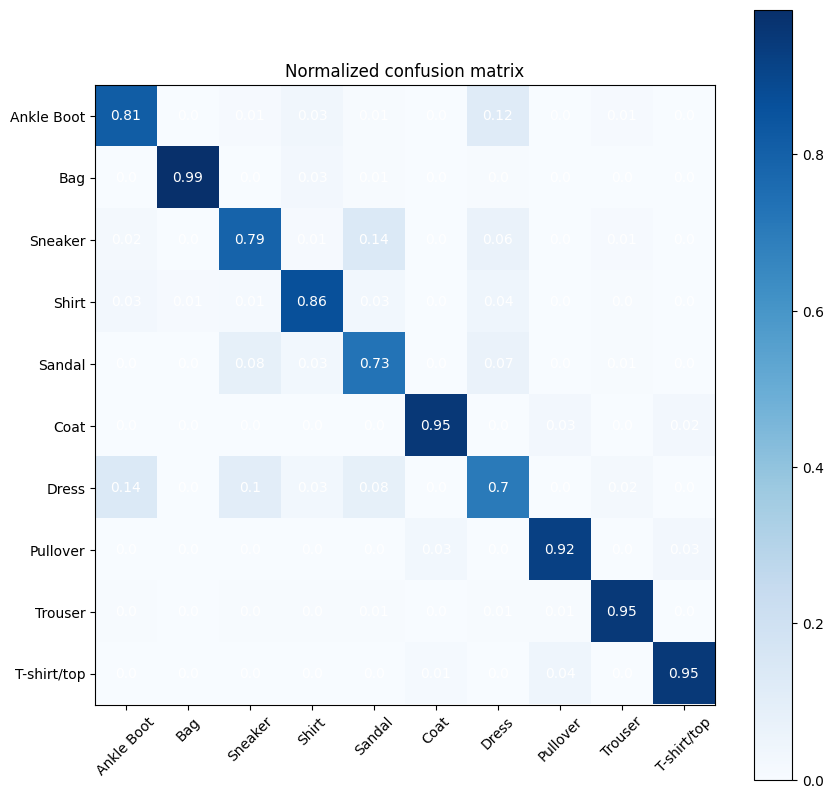

In [107]:
cm = confusion_matrix(y_test, preds)
cm = cm / np.sum(cm,axis=0) # to normalize
cmap = plt.cm.Blues
tick_marks = np.arange(nb_classes)
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, np.around(cm[i, j],decimals=2),
                       ha="center", va="center", color="w")
plt.title('Normalized confusion matrix')
fig.colorbar(im)
plt.xticks(tick_marks, objects, rotation=45)
plt.yticks(tick_marks, objects);